<a href="https://colab.research.google.com/github/Debodun/Machine-Learning/blob/main/Decision%20Tree%20Structure/Decision_tree_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline#for encoding
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

Read the files

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Weather.csv to Weather.csv


In [ ]:
df = pd.read_csv("Weather.csv")
print(df)

     Outlook  Temp Humidity  Windy Play Golf
0      Rainy   Hot     High  False        No
1      Rainy   Hot     High   True        No
2   Overoast   Hot     High  False       Yes
3      Sunny  Mild     High  False       Yes
4      Sunny  Cool   Normal  False       Yes
5      Sunny  Cool   Normal   True        No
6   Overoast  Cool   Normal   True       Yes
7      Rainy  Mild     High  False        No
8      Rainy  Cool   Normal  False       Yes
9      Sunny  Mild   Normal  False       Yes
10     Rainy  Mild   Normal   True       Yes
11  Overoast  Mild     High   True       Yes
12  Overoast   Hot   Normal  False       Yes
13     Sunny  Mild     High   True        No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Outlook    14 non-null     object
 1   Temp       14 non-null     object
 2   Humidity   14 non-null     object
 3   Windy      14 non-null     bool  
 4   Play Golf  14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


Check if there are missing values

In [ ]:
df.isnull().any()

Outlook      False
Temp         False
Humidity     False
Windy        False
Play Golf    False
dtype: bool

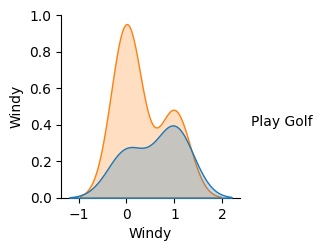

In [ ]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'Play Golf')

<Axes: >

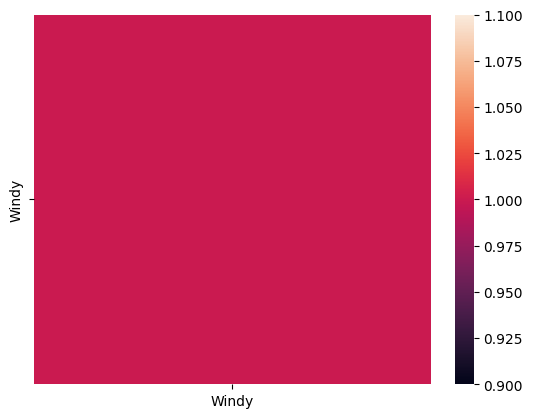

In [ ]:
# correlation matrix
sns.heatmap(df.corr())

# **Data Preprocessing**

Identify the target columns

In [ ]:
#separate the target variable(y) and features(X) as follows
target = df['Play Golf']
df1 = df.copy()
df1 = df1.drop('Play Golf', axis =1)

Convert the variables to numeric values

In [ ]:
# Data has categorical variables stored in it we will encode it in numeric values for working.
X = df1.apply(LabelEncoder().fit_transform)
print(X)

    Outlook  Temp  Humidity  Windy
0         1     1         0      0
1         1     1         0      1
2         0     1         0      0
3         2     2         0      0
4         2     0         1      0
5         2     0         1      1
6         0     0         1      1
7         1     2         0      0
8         1     0         1      0
9         2     2         1      0
10        1     2         1      1
11        0     2         0      1
12        0     1         1      0
13        2     2         0      1


In [ ]:
target

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play Golf, dtype: object

In [ ]:
#label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
target = le.fit_transform(target)
target

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
y = target
print(y)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Testing split input- ", X_test.shape)

Testing split input-  (3, 4)


# **Modeling Tree and testing it**

In [ ]:
from sklearn import tree
# Defining the decision tree algorithmdtree=DecisionTreeClassifier()
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [ ]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



Text(0.5, 1.0, 'Accuracy Score: 1.0')

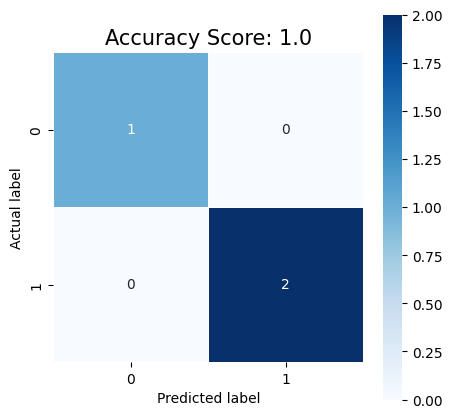

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

# **Visualizing the decision tree**

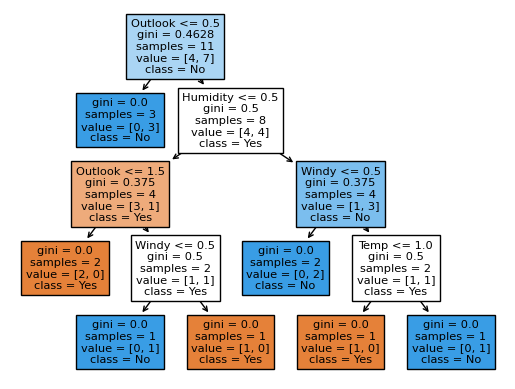

In [ ]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, class_names =["Yes", "No"] , filled = True , precision = 4, rounded = False)

In [18]:
!jupyter nbconvert --to html Decision_tree_weather.ipynb

[NbConvertApp] Converting notebook Decision_tree_weather.ipynb to html
[NbConvertApp] Writing 738116 bytes to Decision_tree_weather.html
